In [39]:
import warnings
warnings.filterwarnings('ignore')

# import sys
# sys.path.insert(1, '../') # make sure to use the code in this repo
# 
# import os
# os.environ['CDF_LIB'] = '/home/peijin/cdf/cdf38_0-dist/lib'

import glob
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
from spacepy import pycdf
from astropy.io import fits as pyfits
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
# try to use the precise epoch 
mpl.rcParams['date.epoch'] = '1970-01-01T00:00:00'
try:
    mdates.set_epoch('1970-01-01T00:00:00')
except:
    pass

In [7]:
year, month, day = '2021-09-18'.split('-')
pathdir = 'D:\Study\Academic\Research\PostDoc_work\DIAS_Fellowship_2024\Work'

nda_files = glob.glob(f'{pathdir}/data/NDA_{day}{month}{year}_*.fits')
nda_files

['D:\\Study\\Academic\\Research\\PostDoc_work\\DIAS_Fellowship_2024\\Work/data\\NDA_18092021_1_07_45_19_15_32_56.fits']

In [9]:
nda_data = pyfits.open(nda_files[0])
nda_data.info()

Filename: D:\Study\Academic\Research\PostDoc_work\DIAS_Fellowship_2024\Work/data\NDA_18092021_1_07_45_19_15_32_56.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   ()      
  1                1 ImageHDU         7   (28060, 400)   float64   
  2                1 ImageHDU         7   (28060, 400)   float64   
  3                1 BinTableHDU     10   400R x 1C   [D]   
  4                1 BinTableHDU     10   28059R x 1C   [D]   


In [10]:
nda_data[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
CREATED = 'A. H    '                                                            
DATE-CRE= '03/05/24'           / Date of file creation                          
DATE-OBS= '18/09/2021'         / Observation Date                               
TIME-OBS= '07:45:19'           / Start Time observation                         
TIME-END= '15:32:56'           / End time observation                           
TIME_RES=                    1 / Time resolution in second                      
FREQ_MIN=                   10 / Frequency min in MHz                           
FREQ_MAX=                   80 / Frequency max in MHz                           
OBJECT  = 'SUN     '        

In [20]:
nda_data[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                28060                                                  
NAXIS2  =                  400                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               

In [21]:
nda_data[2].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                28060                                                  
NAXIS2  =                  400                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               

In [22]:
nda_data[3].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                    8 / length of dimension 1                          
NAXIS2  =                  400 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    1 / number of table fields                         
TTYPE1  = 'frequency_in_MHz'                                                    
TFORM1  = 'D       '                                                            

In [23]:
nda_data[4].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                    8 / length of dimension 1                          
NAXIS2  =                28059 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    1 / number of table fields                         
TTYPE1  = 'time_in_seconds'                                                     
TFORM1  = 'D       '                                                            

In [85]:
### define x and y axes
nda_freq = pd.DataFrame(nda_data[3].data).values.reshape(-1)
nda_time = pd.DataFrame(nda_data[4].data).values.reshape(-1)
nda_arr1 = nda_data[1].data[:, :-1]
nda_arr2 = nda_data[2].data[:, :-1]

datetime_obj_start = nda_data[0].header['DATE-OBS'] + ' ' + nda_data[0].header['TIME-OBS']
datetime_obj_end = nda_data[0].header['DATE-OBS'] + ' ' + nda_data[0].header['TIME-END']

start_obs_time = datetime.strptime(datetime_obj_start, '%d/%m/%Y %H:%M:%S')
end_obs_time = datetime.strptime(datetime_obj_end, '%d/%m/%Y %H:%M:%S')

# Convert time data to datetime objects
time_data = nda_data[4].data
datetimes_list = [pd.Timestamp('2021-09-18 00:00:00') + timedelta(seconds=float(time[0])) for time in time_data]

In [86]:
datetimes_list[0], datetimes_list[-1]

(Timestamp('2021-09-18 07:45:19'), Timestamp('2021-09-18 15:32:56'))

In [87]:
datetime_obj_start, datetime_obj_end

('18/09/2021 07:45:19', '18/09/2021 15:32:56')

In [88]:
len(datetimes_list)

28059

In [89]:
nda_arr1.shape

(400, 28059)

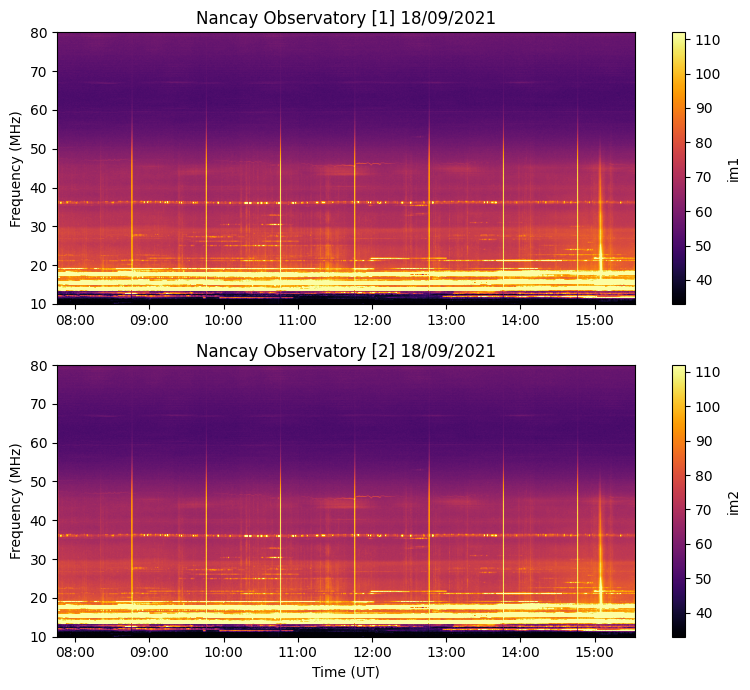

In [90]:
fig = plt.figure(figsize=[8,7])

ax = fig.add_subplot(211)
im1 = ax.imshow(nda_arr1, 
           aspect='auto', origin='lower',
        #    vmin=(np.mean(nda_arr1)-2 * np.std(nda_arr1)),
        #    vmax=(np.mean(nda_arr1)+3 * np.std(nda_arr1)),
    vmin=np.percentile(nda_arr1, 1),
    vmax=np.percentile(nda_arr1, 95),
           extent=[mdates.date2num(datetimes_list[0]), mdates.date2num(datetimes_list[-1]), nda_freq[0], nda_freq[-1]],
           cmap='inferno')

ax.set_ylabel('Frequency (MHz)')
ax.set_title(nda_data[0].header['ORIGIN'] + ' [1] ' + nda_data[0].header['DATE-OBS'])
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.colorbar(im1, label='im1')

ax = fig.add_subplot(212)
im2 = ax.imshow(nda_arr2,
           aspect='auto', origin='lower',
        #    vmin=(np.mean(nda_arr2)-2 * np.std(nda_arr2)),
        #    vmax=(np.mean(nda_arr2)+3 * np.std(nda_arr2)),
    vmin=np.percentile(nda_arr2, 1),
    vmax=np.percentile(nda_arr2, 95),
           extent=[mdates.date2num(datetimes_list[0]), mdates.date2num(datetimes_list[-1]), nda_freq[0], nda_freq[-1]],
           cmap='inferno')

ax.set_xlabel('Time (UT)')
ax.set_ylabel('Frequency (MHz)')
ax.set_title(nda_data[0].header['ORIGIN'] + ' [2] ' + nda_data[0].header['DATE-OBS'])
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.colorbar(im2, label='im2')

fig.tight_layout()
plt.show()

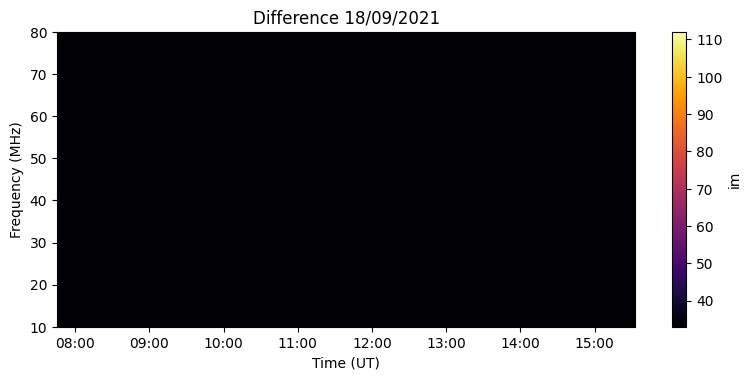

In [99]:
nda_diff = nda_arr2 - nda_arr1

fig = plt.figure(figsize=[8,7])

ax = fig.add_subplot(211)
im = ax.imshow(nda_diff, 
           aspect='auto', origin='lower',
    vmin=np.percentile(nda_diff, 1),
    vmax=np.percentile(nda_diff, 70),
           extent=[mdates.date2num(datetimes_list[0]), mdates.date2num(datetimes_list[-1]), nda_freq[0], nda_freq[-1]],
           cmap='inferno')

ax.set_xlabel('Time (UT)')
ax.set_ylabel('Frequency (MHz)')
ax.set_title('Difference ' + nda_data[0].header['DATE-OBS'])
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.colorbar(im2, label='im')

fig.tight_layout()
plt.show()

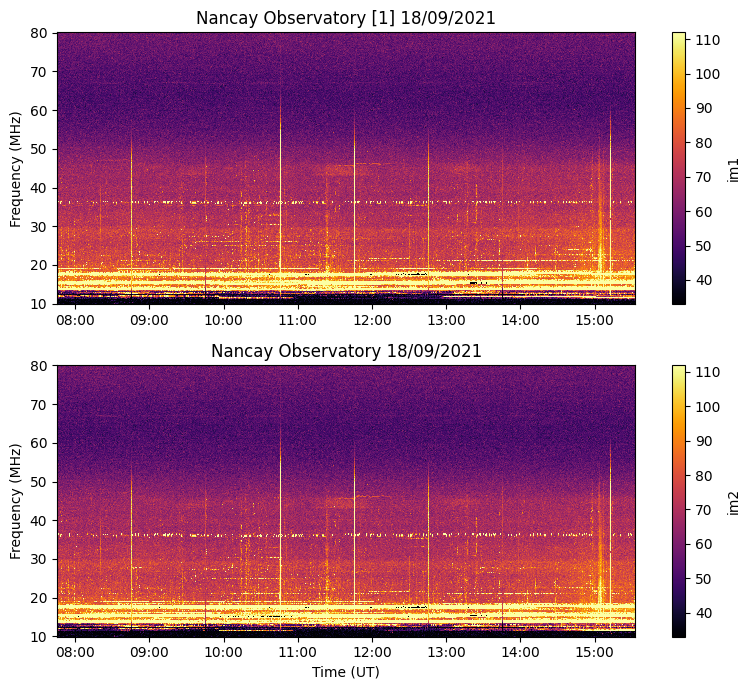

In [109]:
fig = plt.figure(figsize=[8,7])

ax = fig.add_subplot(211)
im1 = ax.pcolormesh(datetimes_list, nda_freq, nda_arr1,
    vmin=np.percentile(nda_arr1, 1),
    vmax=np.percentile(nda_arr1, 95),
           cmap='inferno')

ax.set_ylabel('Frequency (MHz)')
ax.set_title(nda_data[0].header['ORIGIN'] + ' [1] ' + nda_data[0].header['DATE-OBS'])
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.colorbar(im1, label='im1')

ax = fig.add_subplot(212)
im2 = ax.pcolormesh(datetimes_list, nda_freq, nda_arr2,
    vmin=np.percentile(nda_arr2, 1),
    vmax=np.percentile(nda_arr2, 95),
           cmap='inferno')

ax.set_xlabel('Time (UT)')
ax.set_ylabel('Frequency (MHz)')
ax.set_title(nda_data[0].header['ORIGIN'] + ' [2] ' + nda_data[0].header['DATE-OBS'])
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.colorbar(im2, label='im2')

fig.tight_layout()
plt.show()

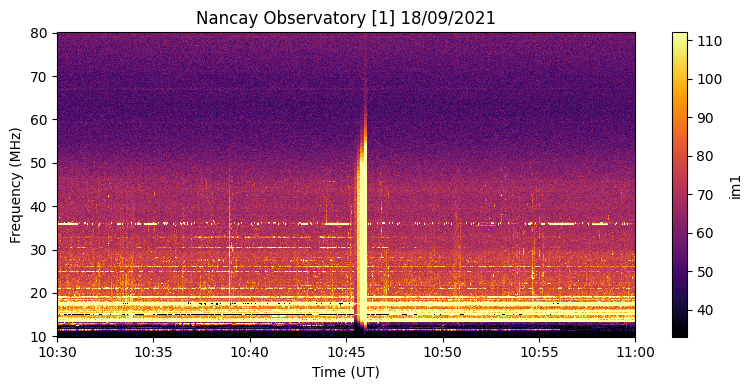

In [112]:
fig = plt.figure(figsize=[8,4])
ax = fig.add_subplot(111)
im1 = ax.pcolormesh(datetimes_list, nda_freq, nda_arr1,
    vmin=np.percentile(nda_arr1, 1),
    vmax=np.percentile(nda_arr1, 95),
           cmap='inferno')

ax.set_xlim(left=pd.Timestamp('2021-09-18 10:30'), right=pd.Timestamp('2021-09-18 11:00'))
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Frequency (MHz)')
ax.set_title(nda_data[0].header['ORIGIN'] + ' [1] ' + nda_data[0].header['DATE-OBS'])
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.colorbar(im1, label='im1')
fig.tight_layout()
plt.show()

In [95]:
nda_arr1.shape, nda_arr2.shape, len(datetimes_list), len(time_data)

((400, 28059), (400, 28059), 28059, 28059)

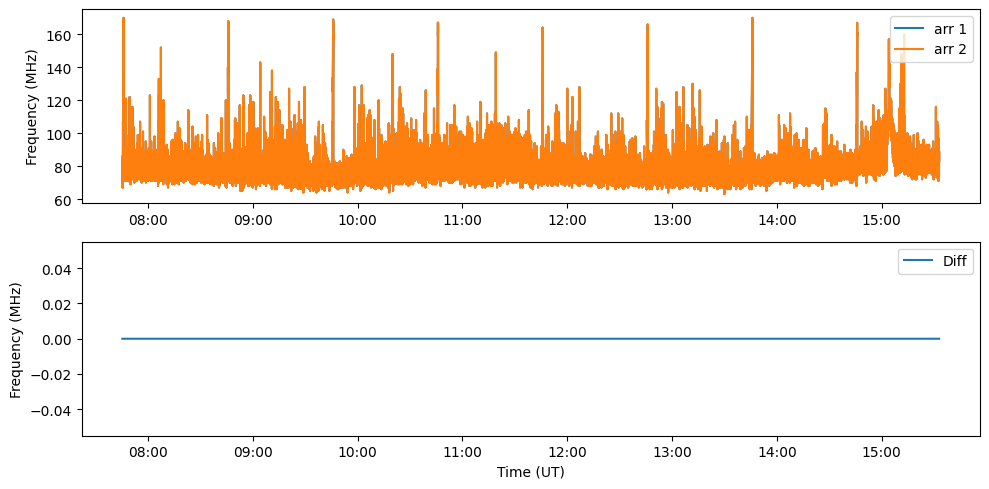

In [107]:
fig = plt.figure(figsize=[10,5])

ax = fig.add_subplot(211)
ax.plot(datetimes_list, nda_arr1[70,:], label='arr 1')
ax.plot(datetimes_list, nda_arr2[70,:], label='arr 2')
ax.set_ylabel('Frequency (MHz)')
ax.legend()
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

ax = fig.add_subplot(212)
ax.plot(datetimes_list, nda_diff[70,:], label='Diff')
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Frequency (MHz)')
ax.legend()
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

fig.tight_layout()
plt.show()